**Name:** David Andrejsin  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Assignment:** Lab 4: Regression Analysis with Regularization Techniques

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for easier exploration
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# Explore dataset features
print("Feature names:", diabetes.feature_names)
print("Target shape:", diabetes.target.shape)
print("Data shape:", diabetes.data.shape)

# Summary statistics
display(df.describe())

# Check for missing values
df.isnull().sum()



Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target shape: (442,)
Data shape: (442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


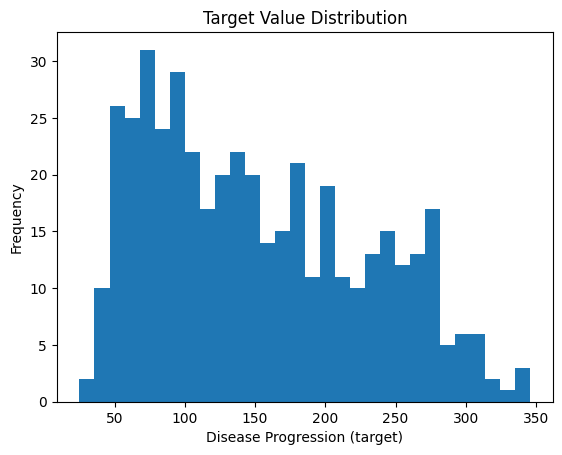

In [3]:
# Visualize the target distribution
plt.hist(df['target'], bins=30)
plt.xlabel('Disease Progression (target)')
plt.ylabel('Frequency')
plt.title('Target Value Distribution')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Let's choose 'bmi' as our single feature (this is commonly used for diabetes progression)
X = df[['bmi']].values  # feature matrix (2D)
y = df['target'].values  # target vector

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.23


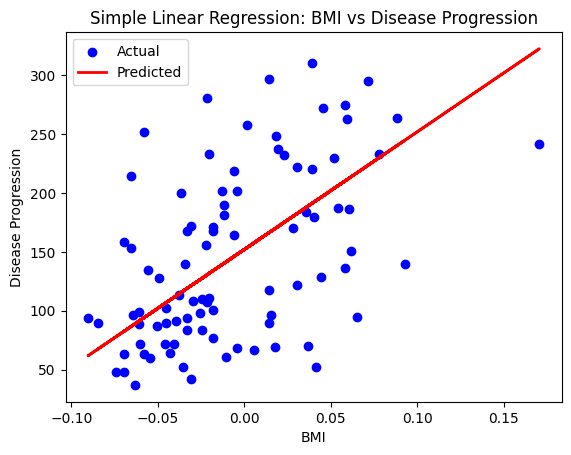

In [5]:
# Visualize the model's predictions
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.show()


In [6]:
# We'll use all features for multiple regression
X_multi = df[diabetes.feature_names].values
y = df['target'].values

# Split into train/test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict on test data
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.2f}")
print(f"R² Score: {r2_multi:.2f}")


Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R² Score: 0.45


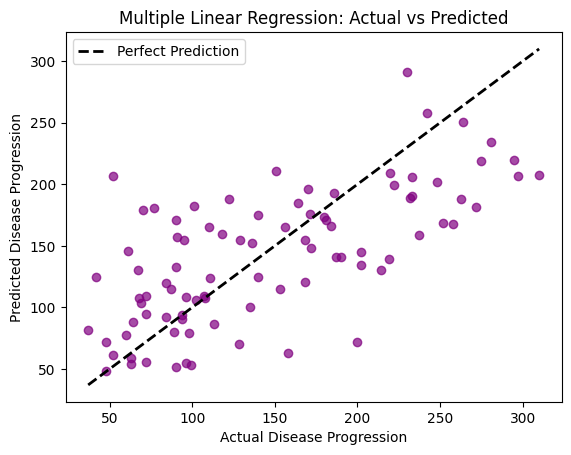

In [7]:
# Visualize predicted vs actual values
plt.scatter(y_test_multi, y_pred_multi, color='purple', alpha=0.7)
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()],
         color='black', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()



Polynomial Degree: 2
MAE: 52.38
MSE: 4085.03
RMSE: 63.91
R²: 0.23


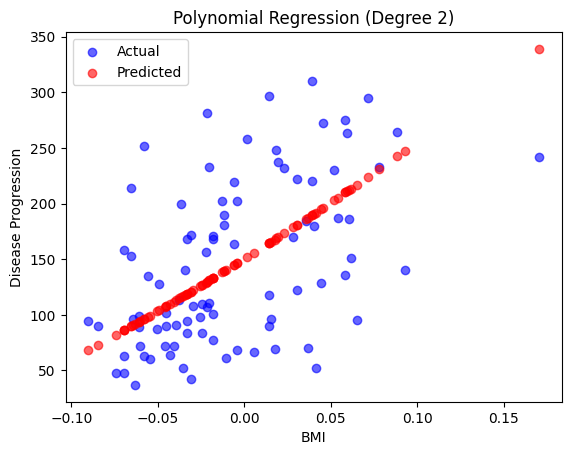


Polynomial Degree: 3
MAE: 52.18
MSE: 4064.44
RMSE: 63.75
R²: 0.23


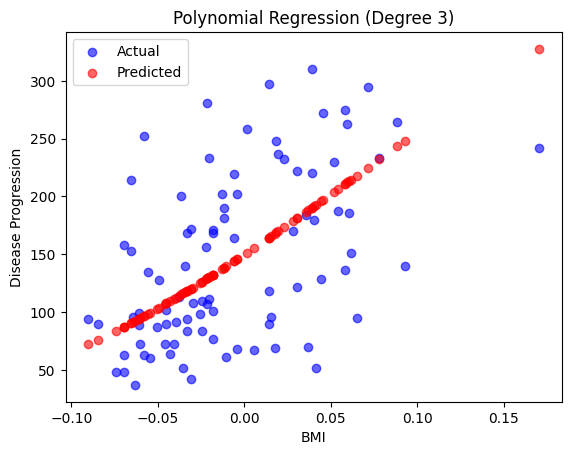


Polynomial Degree: 5
MAE: 51.88
MSE: 4085.85
RMSE: 63.92
R²: 0.23


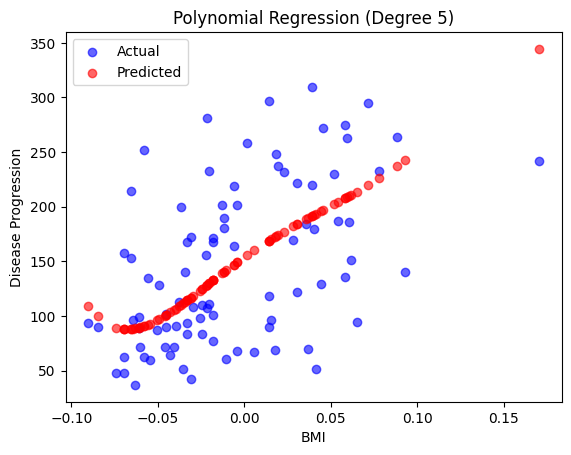


Polynomial Degree: 7
MAE: 52.41
MSE: 4193.10
RMSE: 64.75
R²: 0.21


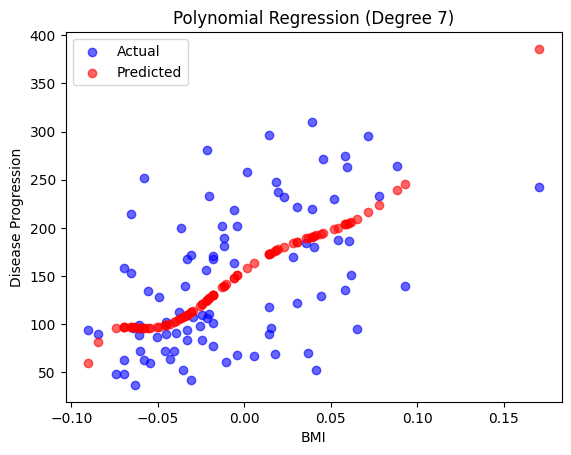


Polynomial Degree: 9
MAE: 57.47
MSE: 7205.33
RMSE: 84.88
R²: -0.36


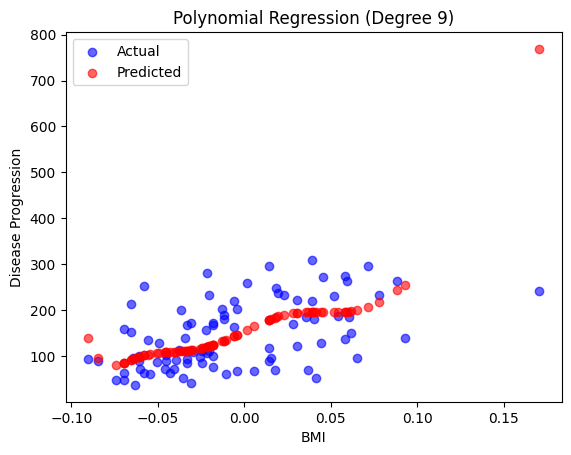


Polynomial Degree: 11
MAE: 67.96
MSE: 27406.67
RMSE: 165.55
R²: -4.17


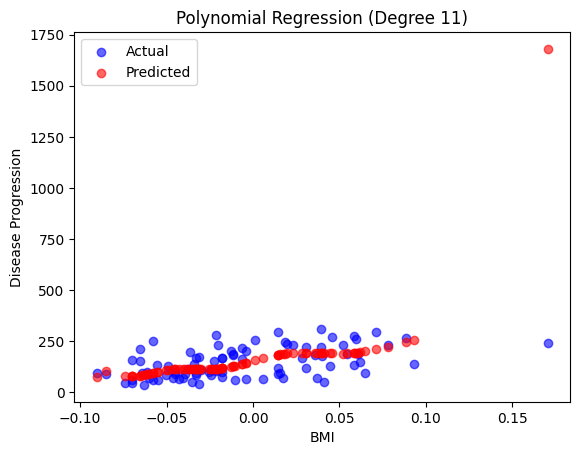

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Use one feature to keep visualization simple (e.g., 'bmi')
X_poly_base = df[['bmi']].values
y = df['target'].values

# Function to train polynomial regression and report performance
def run_poly_regression(degree):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_poly_base)

    # Split
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Model
    model_p = LinearRegression()
    model_p.fit(X_train_p, y_train_p)

    # Predict
    y_pred_p = model_p.predict(X_test_p)

    # Metrics
    mae = mean_absolute_error(y_test_p, y_pred_p)
    mse = mean_squared_error(y_test_p, y_pred_p)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_p, y_pred_p)

    print(f"\nPolynomial Degree: {degree}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    # Plot
    plt.scatter(X_test_p[:, 1], y_test_p, color='blue', label='Actual', alpha=0.6)
    plt.scatter(X_test_p[:, 1], y_pred_p, color='red', label='Predicted', alpha=0.6)
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Run for different degrees
for degree in [2, 3, 5, 7, 9, 11]:
    run_poly_regression(degree)



Ridge Regression (alpha=1.0)
MAE: 46.12
MSE: 3075.13
RMSE: 55.45
R²: 0.42


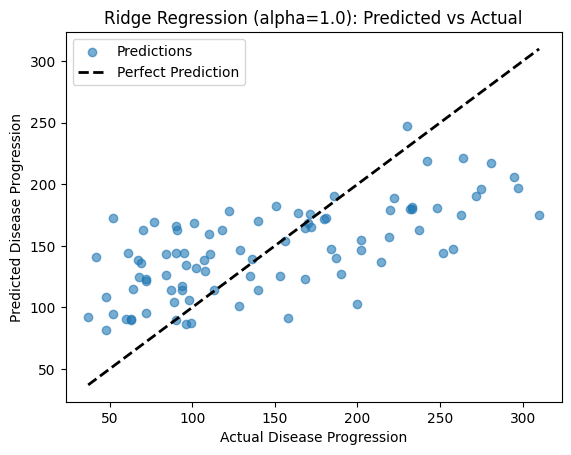


Lasso Regression (alpha=1.0)
MAE: 49.73
MSE: 3403.58
RMSE: 58.34
R²: 0.36


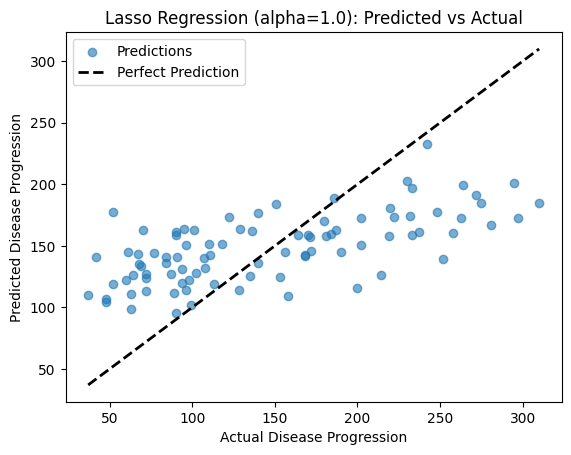

In [13]:
from sklearn.linear_model import Ridge, Lasso

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X_base)

# Train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Function to run and evaluate Ridge/Lasso
def run_regularized_model(model, model_name):
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)

    mae = mean_absolute_error(y_test_r, y_pred)
    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_r, y_pred)

    print(f"\n{model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    # Plot predicted vs actual
    plt.scatter(y_test_r, y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_test_r.min(), y_test_r.max()],
             [y_test_r.min(), y_test_r.max()],
             color='black', linestyle='--', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Disease Progression')
    plt.ylabel('Predicted Disease Progression')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.legend()
    plt.show()

# Example alpha values
alpha_val = 1.0

# Ridge
ridge_model = Ridge(alpha=alpha_val)
run_regularized_model(ridge_model, f'Ridge Regression (alpha={alpha_val})')

# Lasso
lasso_model = Lasso(alpha=alpha_val, max_iter=10000)
run_regularized_model(lasso_model, f'Lasso Regression (alpha={alpha_val})')



Ridge Regression (alpha=0.01)
MAE: 41.46
MSE: 2732.67
RMSE: 52.27
R²: 0.48


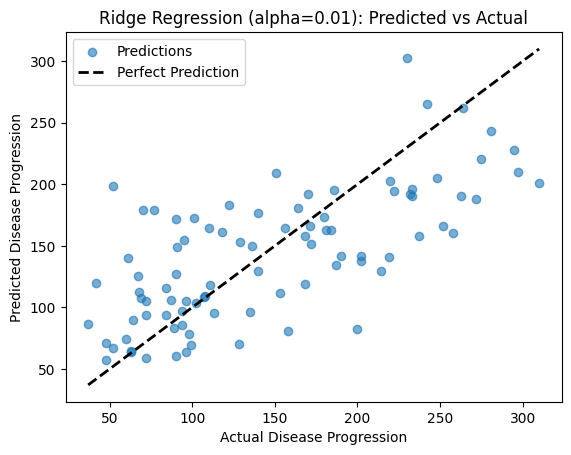


Lasso Regression (alpha=0.01)
MAE: 41.12
MSE: 2698.03
RMSE: 51.94
R²: 0.49


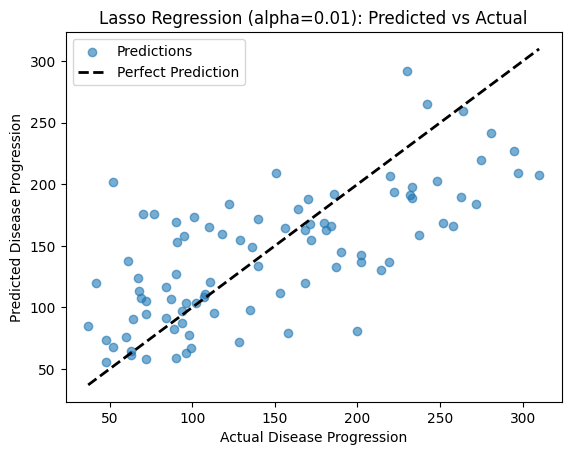


Ridge Regression (alpha=0.1)
MAE: 42.81
MSE: 2829.61
RMSE: 53.19
R²: 0.47


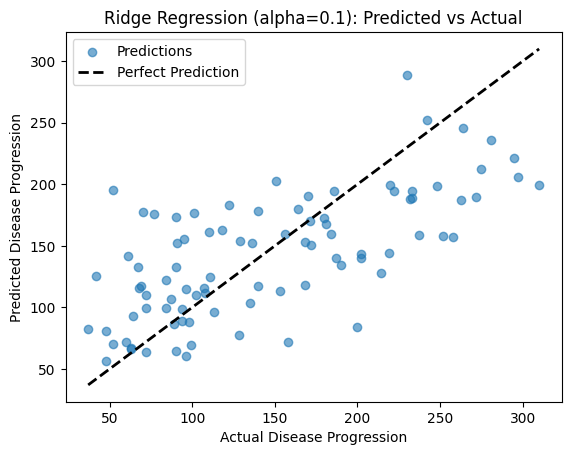


Lasso Regression (alpha=0.1)
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R²: 0.47


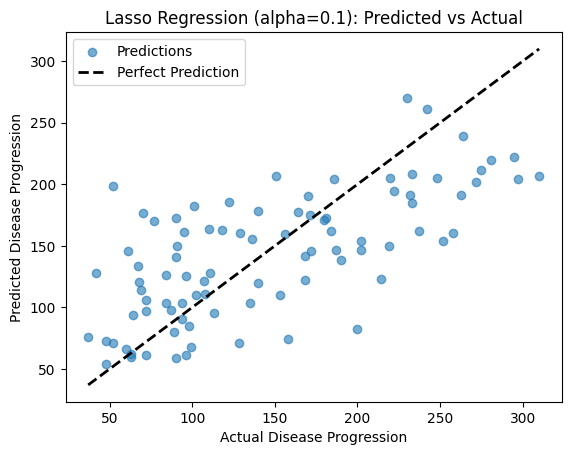


Ridge Regression (alpha=1)
MAE: 46.12
MSE: 3075.13
RMSE: 55.45
R²: 0.42


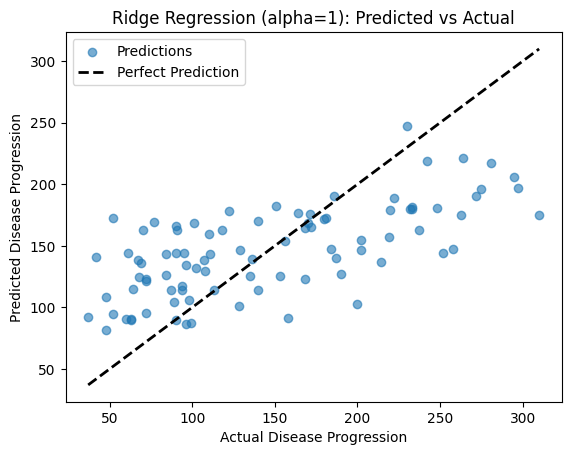


Lasso Regression (alpha=1)
MAE: 49.73
MSE: 3403.58
RMSE: 58.34
R²: 0.36


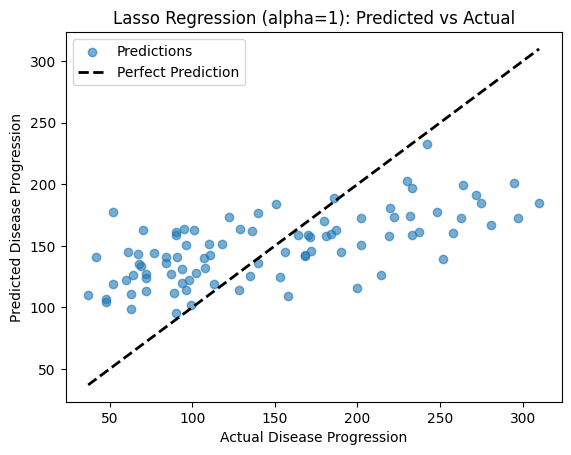


Ridge Regression (alpha=10)
MAE: 58.03
MSE: 4443.81
RMSE: 66.66
R²: 0.16


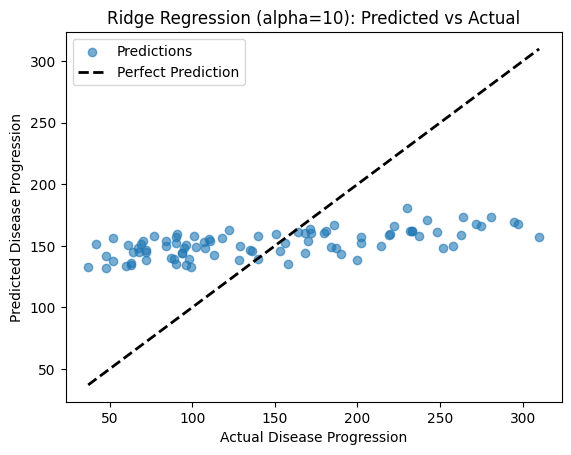


Lasso Regression (alpha=10)
MAE: 64.01
MSE: 5361.53
RMSE: 73.22
R²: -0.01


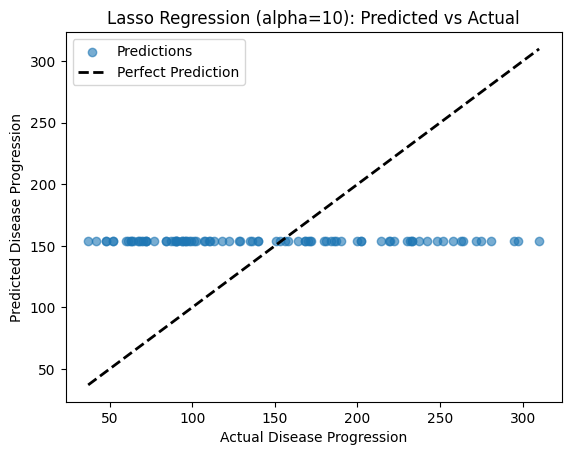

In [15]:
for alpha in [0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha)
    run_regularized_model(ridge, f'Ridge Regression (alpha={alpha})')

    lasso = Lasso(alpha=alpha, max_iter=10000)
    run_regularized_model(lasso, f'Lasso Regression (alpha={alpha})')
